# World Happiness Report

## Problem Statement:

The World Happiness Report is a landmark survey of the state of global happiness. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. 

The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

#### Reuirement-You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df_happiness=pd.read_csv("Happiness Score.csv")
df_happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df_happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

About All the columns
1.Country: This column shows all the different countries which are there in the happiness report list.

2.Region : It shows how different regions which are there which basically also tells that which country falls in which regions

3.Happiness_Rank: This is giving us the idea that acccording to the region and country which country has the highest ranking in happiness

4.Standard error: The standard error which can be taken as the estimate of the std deviations which shows us the variance or variability in the , data report

5.Economy(GDP percapita): The extent to which GDP contributes to the calculation of the Happiness Score.

6.Family: The extent to which Family contributes to the calculation of the Happiness Score
    
7.Health (Life Expectancy): how much people keep them healthy and thus increasing their life expectancy

8.Freedom: - how much people are independent about doing any task in their respective lives as lack of freedom may slaught down anyone's happiness.

9.Trust (Government Corruption) : this simply tell us about the political parties in that particular country which are doing corruption and cutting the happiness means of people in some way

10.Generosity: This shows that how much people are kind for each other in a country

11.Dystopia Residual: -Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared

12. Happiness Score(Target): A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

## Starting the EDA

In [4]:
df_happiness.shape

(158, 12)

Obs- We have already observed the dataset contains 12 columns, where there are 11 input(predictor) columns and 1 output(target) column.

The target column("Happiness Score") contains discrete continuous values and hence we will be building:"Regression Model"

In [5]:
#Checking for data types of all columns
df_happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Obs-Except for columns "Country" and "Religion" that contain categorical data, all others contain continuous data. We will encode  "Country" and "Religion" columns later

In [6]:
#Checking for null values
df_happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Obs- No null value present in the data set

In [7]:
#Checking the number of unique values in all columns
df_happiness.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [8]:
#Obtaining description of all columns
df_happiness.describe(include="all") #added "all" since categorical data present

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


Obs- The mean in columns: "Economy","Family","Health","Freedom" is slightly less then median, so we can interpret the data here will be slightly left skewed

    The mean in columns:"Standard Error", "Trust","Generosity","Dystopia" is slightly more than median, so we can interpret the data here must be lightly right skewed
        
    The max of columns: "Standard Error","Trust","Generosity","Dystopia" is unboundably higher than 75% so we can predict there might be some outliers in these columns

## Data Cleaning and Pre-Processing

### Deleting the unwanted columns

For the model performance, Happiness Rank is not necessary ,wice that can be obtained after finding the target-"Happiness Score", so dropping that column

In [9]:
df_happiness.drop(columns=['Happiness Rank'],axis = 1,inplace = True)
df_happiness.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df_happiness.shape

(158, 11)

### Data Visualization

#### Univariate Analysis

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


<AxesSubplot:xlabel='Region', ylabel='count'>

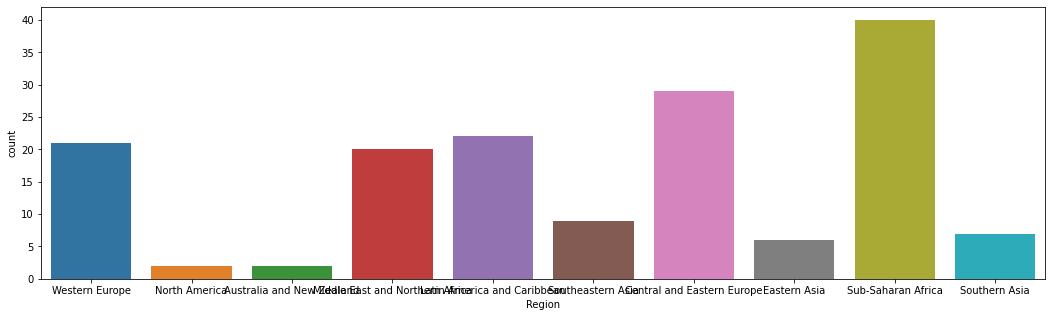

In [11]:
plt.figure(figsize=(18,5))
print(df_happiness["Region"].value_counts())
sns.countplot(x="Region", data=df_happiness)

Obs- We can observe "Sub-Saharan Africa" has the maximum of "Countries(40)", followed by "Central and Eastern Europe" having "countries(29)", 

And the least number of "Countries(2) are from the regions "North America" and "Australia and New Zealand"       

<AxesSubplot:xlabel='Happiness Score'>

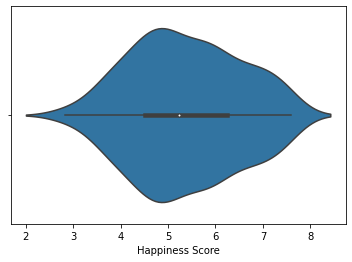

In [12]:
sns.violinplot( x="Happiness Score", data=df_happiness)

obs- We can see maximum countries fall in the happiness score of 4.5-5.5, a few developed countries fall has happiness score around 8, and a few under developed countries have happiness score of 2-3

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

<Figure size 1440x2160 with 0 Axes>

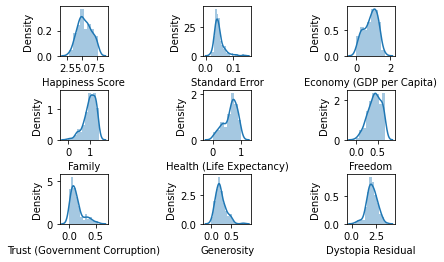

In [13]:
# Next, we will plot distribution plot of all columns in same figure(to check skewness)
plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,3)
fig.subplots_adjust(hspace=0.7, wspace=2)

sns.distplot(df_happiness['Happiness Score'], ax=axes[0,0])
sns.distplot(df_happiness['Standard Error'], ax=axes[0,1])
sns.distplot(df_happiness['Economy (GDP per Capita)'], ax=axes[0,2])
sns.distplot(df_happiness['Family'], ax=axes[1,0])
sns.distplot(df_happiness['Health (Life Expectancy)'], ax=axes[1,1])
sns.distplot(df_happiness['Freedom'], ax=axes[1,2])
sns.distplot(df_happiness['Trust (Government Corruption)'], ax=axes[2,0])
sns.distplot(df_happiness['Generosity'], ax=axes[2,1])
sns.distplot(df_happiness['Dystopia Residual'], ax=axes[2,2])

Obs-We can see left skewness in columns:"Economy","Family","Health","Freedom" 

    We can see right skewness in columns: "Standar Error","Trust","Generosity","Dystopia"

    We will be treating the skewness further

Happiness Score                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
Standard Error                   AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.222059)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

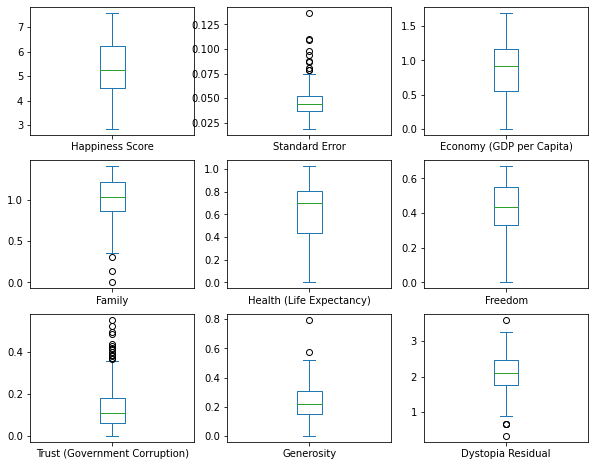

In [14]:
#Next, we will plot box plot of all columns in same figure(to check outliers)
df_happiness.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8))

Obs- We can see outliers are present in columns:"Standard Error", "Family", "Trust", "Generosity", "Dystopia" 

#### Bivariate Analysis

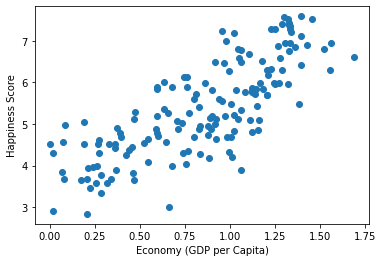

In [15]:
plt.scatter(df_happiness['Economy (GDP per Capita)'],df_happiness['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

Obs- With the increase in economy, the Happiness score also increases, as people can avail many facilities

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

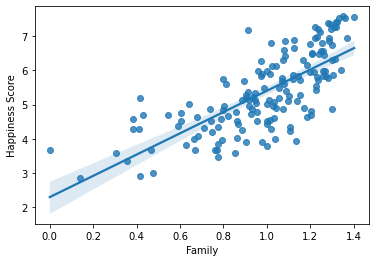

In [16]:
sns.regplot(x='Family', y ='Happiness Score', data =df_happiness)

Obs-Family plays an important role in creating happiness and thus increasing the happiness score

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

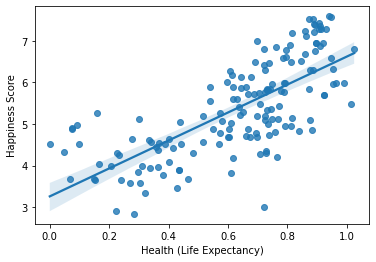

In [17]:
sns.regplot(x='Health (Life Expectancy)',y ='Happiness Score', data =df_happiness)

Obs-With good health comes good happiness score

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

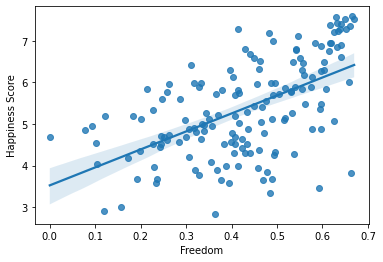

In [18]:
sns.regplot(x='Freedom',y ='Happiness Score', data =df_happiness)

Obs-Countries where good freedom is provided, Happiness Score is high 

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

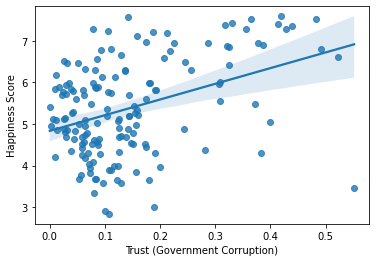

In [19]:
sns.regplot(x='Trust (Government Corruption)',y ='Happiness Score', data =df_happiness)

Obs-Most countries do fall where Government does major corruption and thus happiness score decrease there

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

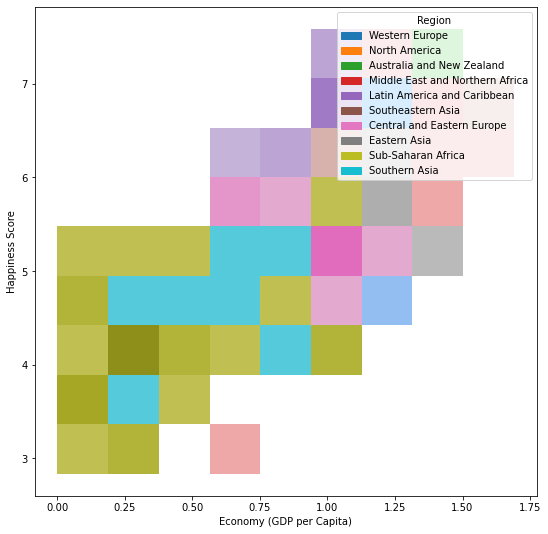

In [20]:
plt.figure(figsize = (9,9))
sns.histplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df_happiness,hue='Region')
#plt.legend()

Obs- We can see
"Sub-Saharan Africa" has least-economy and so has least-Happiness Score(3-5.5), 

"Southern Asia" lies in low-mid-economy and happiness score is also average there(4.5-5.5).

"Central and Eastern Europe" lies in good-economy but happiness score is average(4.5-6).

"Eastern Asia" has best-economy but happiness score is again average(6.5-7)

"Latin America and Caribbean" they fall in mid-economy but have very good happiness score(6-8)

"North America" fall in best-economy and has very good happiness score(5.5-8)

"Middle East and North Africa" falls in best-economy and has good happiness score(6-8)

"Southern Asia" falls in best-economy and has very good happiness score(6.5-7)

"Western Europe" also falls in best-economy and has very good happiness score(6.5-7)

"Australia and NewZealand" falls in best-economy and has excellent happiness score(7-8)

#### Multivariate Analysis

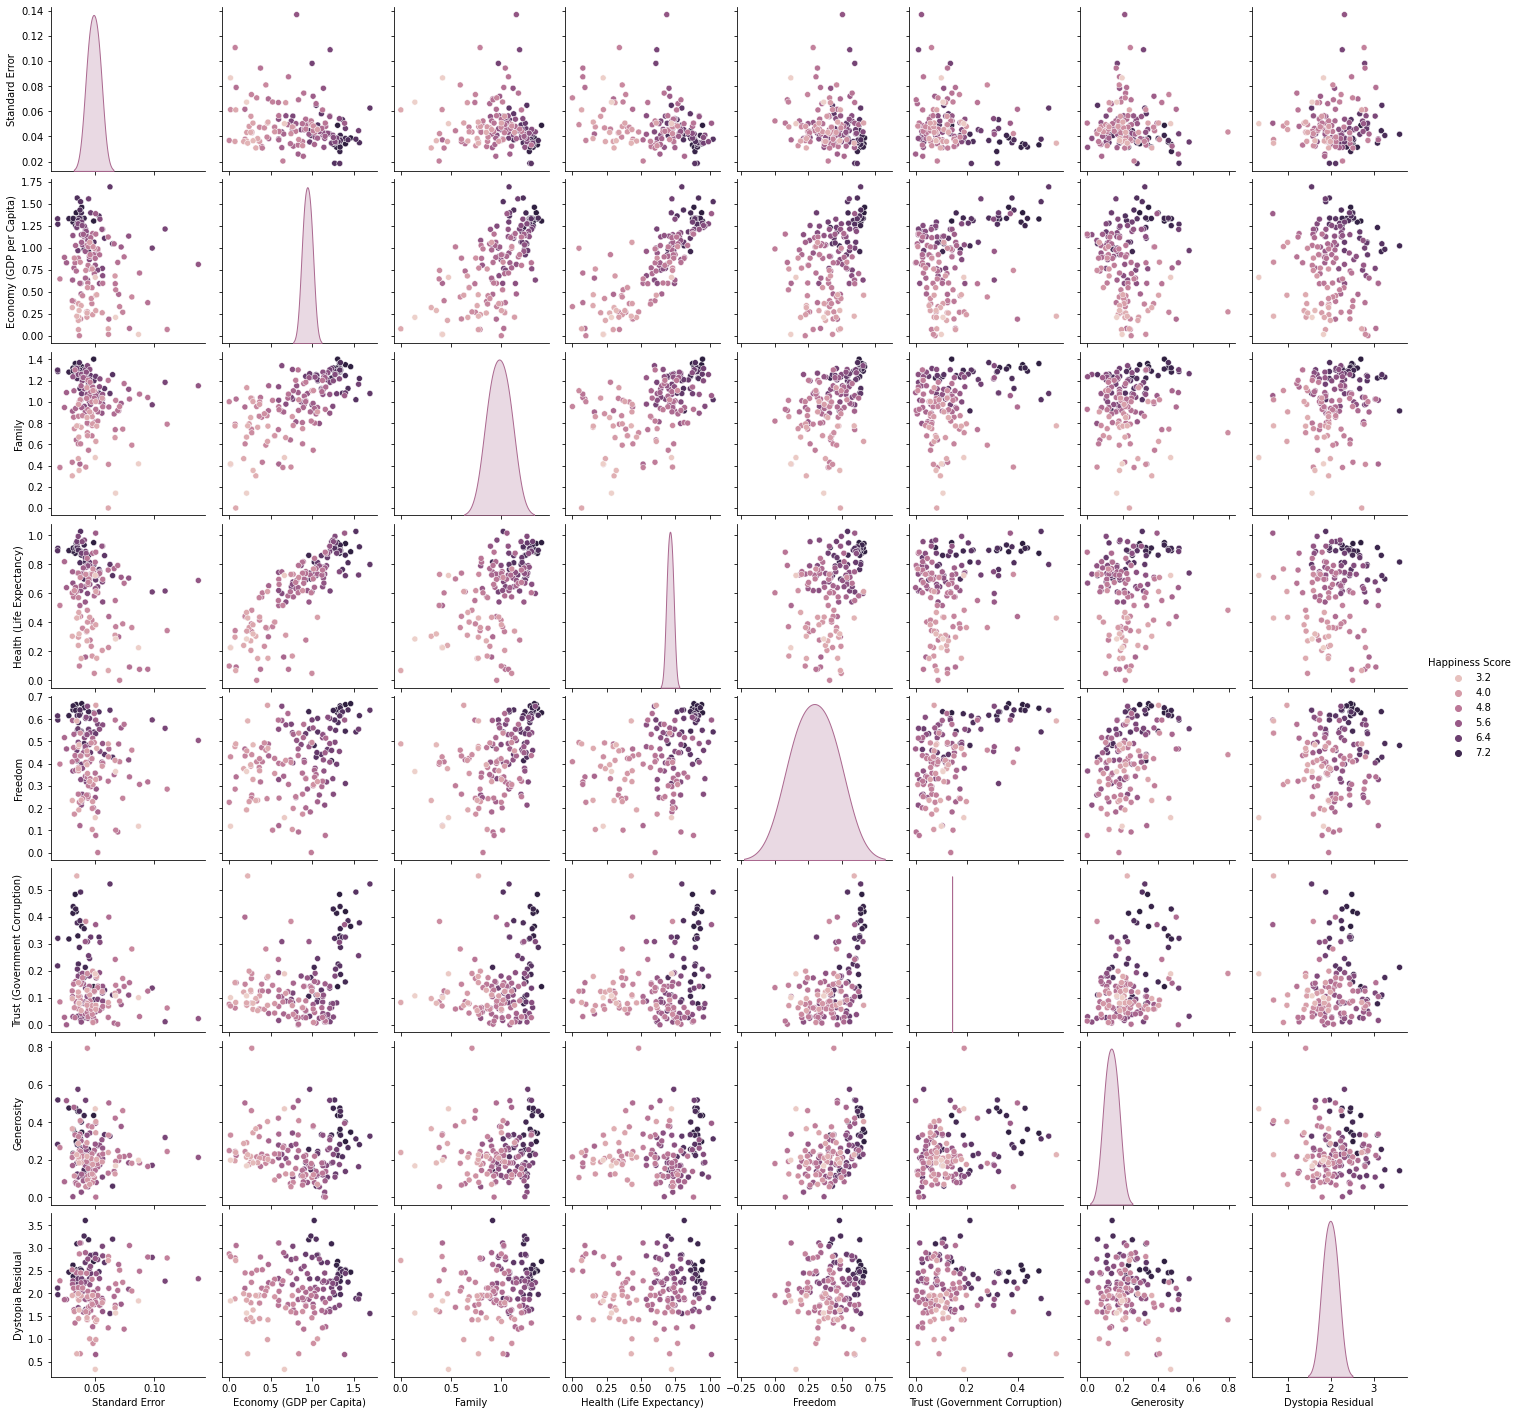

In [21]:
sns.pairplot(df_happiness,hue="Happiness Score")

### Encoding Categorical Data

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_happiness['Country']=le.fit_transform(df_happiness['Country'])
df_happiness['Region']=le.fit_transform(df_happiness['Region'])
df_happiness

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Obs- The Label Encoder has encoded both the categorical columns "Country" and "Region" values wrt ascending order of their names

### Checking Correlation

In [23]:
df_happiness.corr()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,0.083380,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.118085,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


<AxesSubplot:>

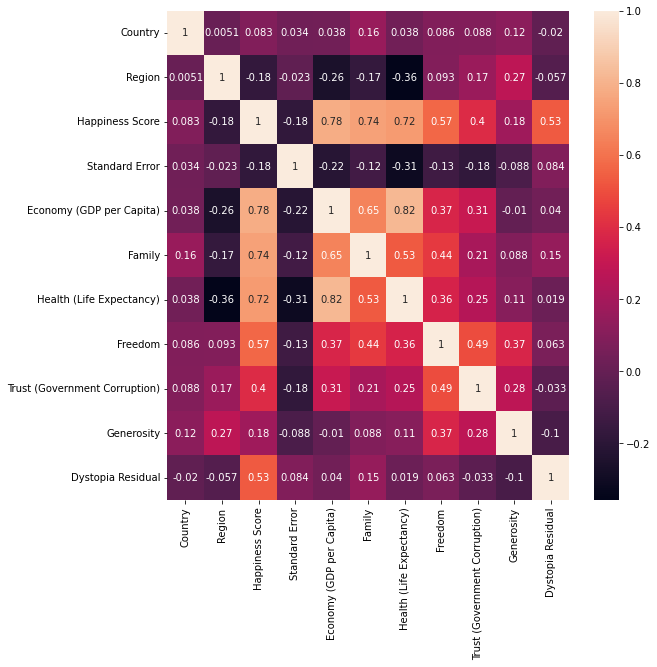

In [24]:
#displaying Correlation using heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df_happiness.corr(),annot=True)

Obs- Highly Positive correlated-("Happiness Score and Economy (GDP per Capita)"),("Happiness Score and Family"),("Happiness Score and Health (Life Expectancy)"),("Economy and Health (Life Expectancy)")

    Moderately Positive correlated-("Happiness Score and Freedom"),("Happiness Score and Government"),("Family and Economy") ,("Family and Health (Life Expectancy)"),("Happiness Score and Dystopia")
    
    Moderately Negtative Correalated-(" Standard Error with all coulumns )
    
    Economy and Health are highly correlated but are playing independent roles so we can say there is no multi-collinearity

## Data Transformation

### Checking for skewness

In [25]:
df_happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see data is highly skewed in columns "Standard Error","Family","Health","Trust","Generosity"

Transforming the data and re-checking the skewness

### Applying Transformation Method

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #deafault method=boxcox

skew_col = ["Standard Error","Family","Health (Life Expectancy)","Trust (Government Corruption)","Generosity"]
df_happiness[skew_col]= pt.fit_transform(df_happiness[skew_col].values)

In [27]:
df_happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64

Obs- We can see the skewness has come within the acceptable range after the power transformation

### Checking for outliers

In [28]:
# Method 1: Z-score
from scipy.stats import zscore
z=np.abs(zscore(df_happiness))
threshold=3
print(np.where(z>3))

(array([ 20,  25, 155], dtype=int64), array([ 3,  3, 10], dtype=int64))


Obs-From the box plot, we already visualized outliers were present earlier in multiple columns.

Here it is exactly showing the locations where outliers are present, removing these locations data further

In [29]:
df_happiness_new=df_happiness[(z<3).all(axis=1)]

In [30]:
print("df_happiness.shape:",df_happiness.shape, "\ndf_happiness_new.shape:",df_happiness_new.shape)

df_happiness.shape: (158, 11) 
df_happiness_new.shape: (155, 11)


In [31]:
# Let's check the the data loss
data_loss = (158-155)/158*100
data_loss

1.89873417721519

In [32]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_happiness.quantile(0.25)
Q3=df_happiness.quantile(0.75)
IQR=Q3 - Q1

df_happiness_new2=df_happiness[~((df_happiness < (Q1 - 1.5 * IQR)) |(df_happiness > (Q3 + 1.5 * IQR))).any(axis=1)]

In [34]:
print("df_happiness.shape:",df_happiness.shape, "\ndf_happiness_new2:",df_happiness_new2.shape)

df_happiness.shape: (158, 11) 
df_happiness_new2: (146, 11)


In [35]:
# Let's check the the data loss
data_loss = (158-146)/158*100
data_loss

7.59493670886076

Obs- The Data Loss in IQR method is more, so we will be going with Z-score method

In [40]:
df_happiness=df_happiness_new # Assigning back the new created dataframe
df_happiness.shape

(155, 11)

### Creating Input(Predictor) and Output(Target) Columns

In [41]:
x=df_happiness.drop(columns=['Happiness Score'],axis=1)
y=df_happiness['Happiness Score']

In [42]:
x.shape

(155, 10)

In [43]:
y.shape

(155,)

### Data Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale

array([[ 1.25850983,  1.31696785, -1.06692593, ...,  1.79825937,
         0.65629233,  0.75453879],
       [-0.43755101,  1.31696785,  0.28778418, ...,  0.3370956 ,
         1.52517961,  1.09745132],
       [-0.90011306,  1.31696785, -1.16184032, ...,  1.93134925,
         0.96553429,  0.70747491],
       ...,
       [-1.4287554 ,  0.98122769, -0.79975538, ..., -0.41436148,
        -0.31172294, -0.88749648],
       [-1.25254129,  0.98122769,  1.99764342, ..., -0.13186014,
        -0.17071479, -0.51652021],
       [ 1.39067042,  0.98122769,  1.34587883, ..., -0.04705636,
        -0.46984   , -1.01011516]])

In [46]:
x=pd.DataFrame(data=x_scale)

## Data Modelling

### Finding Best Random State

In [80]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9976368407170979  on Random_state  47


### Splitting data into Train-Test

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=47)

In [59]:
x_train.shape

(116, 10)

In [60]:
y_train.shape

(116,)

In [61]:
x_test.shape

(39, 10)

In [62]:
y_test.shape

(39,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [65]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9929888128971498

In [68]:
predlr=lr.predict(x_test)
print("r2_score=",r2_score(y_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predlr))
print("Mean Squared Error:",mean_squared_error(y_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predlr)))

r2_score= 0.9976368407170979 

Mean Absolute Error: 0.048728250460116036
Mean Squared Error: 0.003364328269201692
Root Meand Squared Error: 0.05800282983787681


#### 2. Support Vector Regressor

In [71]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9846438298900284

In [72]:
predsvr=svr.predict(x_test)
print("r2_score=",r2_score(y_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2_score= 0.9512205138008338 

Mean Absolute Error: 0.2049670026338217
Mean Squared Error: 0.06944525727248227
Root Meand Squared Error: 0.26352468057561945


#### 3. Decision Tree Regressor

In [77]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [76]:
preddtr=dtr.predict(x_test)
print("r2_score=",r2_score(y_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2_score= 0.7977395456744809 

Mean Absolute Error: 0.4084871794871795
Mean Squared Error: 0.2879495128205129
Root Meand Squared Error: 0.5366092738860492


#### 4. K Neighbors Regressor

In [78]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.897134607963914

In [79]:
predknr=knr.predict(x_test)
print("r2_score=",r2_score(y_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))

r2_score= 0.9080307892014335 

Mean Absolute Error: 0.29398974358974356
Mean Squared Error: 0.1309326112820512
Root Meand Squared Error: 0.3618461154718276


#### 5.Random Forest Regressor

In [81]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.982556701451018

In [83]:
predrfr=rfr.predict(x_test)
print("r2_score=",r2_score(y_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2_score= 0.9046134741060823 

Mean Absolute Error: 0.29453153846153884
Mean Squared Error: 0.13579769585897458
Root Meand Squared Error: 0.3685073891511194


#### 6.Ada Boost Regressor

In [84]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
adr.score(x_train,y_train)

0.9522886633681076

In [85]:
predadr=adr.predict(x_test)
print("r2_score=",r2_score(y_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predadr))
print("Mean Squared Error:",mean_squared_error(y_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predadr)))

r2_score= 0.8728420091787252 

Mean Absolute Error: 0.3581240671749522
Mean Squared Error: 0.1810293644910577
Root Meand Squared Error: 0.42547545697849326


#### 7.Gradient Boosting Regressor

In [86]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.9994561643410711

In [87]:
predgbr=gbr.predict(x_test)
print("r2_score=",r2_score(y_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr)))

r2_score= 0.938295595554364 

Mean Absolute Error: 0.24032347480070262
Mean Squared Error: 0.08784590768497558
Root Meand Squared Error: 0.29638810314345543


### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [127]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9608019104371348

In [128]:
predls=ls.predict(x_test)
print("r2_score=",r2_score(y_test,predls),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predls))
print("Mean Squared Error:",mean_squared_error(y_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predls)))

r2_score= 0.9682506419462393 

Mean Absolute Error: 0.18437033201423936
Mean Squared Error: 0.04520019602660876
Root Meand Squared Error: 0.2126033772699972


#### 9. Ridge Regression

In [130]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.992988451313897

In [131]:
predrg=rg.predict(x_test)
print("r2_score=",r2_score(y_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrg))
print("Mean Squared Error:",mean_squared_error(y_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrg)))

r2_score= 0.9976584259941093 

Mean Absolute Error: 0.048462918906338234
Mean Squared Error: 0.003333598238359824
Root Meand Squared Error: 0.057737321018209914


Obs- Linear Regression, Lasso , Ridge all the three models are performing excepttionally well

Now, to select the best- model, comparing Training Accuracy, Test Accuracy and Errors of these model

Linear Reg:(score: 0.9929888128971498, r2_score: 0.9976368407170979, mean abs error:0.048728250460116036) 

Lasso:(score: 0.9608019104371348, r2_score: 0.9682506419462393 , mean abs error:0.18437033201423936)

Ridge:(score: 0.992988451313897, r2_score: 0.9976584259941093 , mean abs error:0.048462918906338234) 

We can observe all the models are giving almost same r2_score and error-rate, still with fractions Ridge is giving more r2_score and less mean abs error and therefore selecting Ridge as our best-fit-model 

### Cross-Validation of model

In [132]:
# Since the model is performing is performing exceptionally well, lets check whether it is overfitting by Cross-Val-Score
# Using of K-Fold cross-validation technique

predrg= rg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= r2_score(y_test,predrg)

for j in range(2,10):
    cv_score=cross_val_score(rg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('R2_score is :',test_accuracy*100)
    print("\n")

At cv: 2
Cross_Validation_score is: 91.26184463638751
R2_score is : 99.76584259941093


At cv: 3
Cross_Validation_score is: 92.08542230689338
R2_score is : 99.76584259941093


At cv: 4
Cross_Validation_score is: 87.42325792561566
R2_score is : 99.76584259941093


At cv: 5
Cross_Validation_score is: 84.33151928153373
R2_score is : 99.76584259941093


At cv: 6
Cross_Validation_score is: 78.13965039592829
R2_score is : 99.76584259941093


At cv: 7
Cross_Validation_score is: 67.01324881663832
R2_score is : 99.76584259941093


At cv: 8
Cross_Validation_score is: 60.03484525577408
R2_score is : 99.76584259941093


At cv: 9
Cross_Validation_score is: 54.393323493269065
R2_score is : 99.76584259941093




Obs- Yes, our model is over-fitted and further we will be selecting cv=3, where the cross-val score and r2_score have least difference

### Hyper Parameter Tuning

In [133]:
#defining parameters
parameters={'alpha':[.0001,.001,.01,.1,1.0,10], 'random_state':list(range(0,10))}
#start the tuning
rg=Ridge()
GCV=GridSearchCV(rg,parameters,cv=3)

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'alpha': 1.0, 'random_state': 0}


In [143]:
#Applying best parameter values on Ridge Algorithm 
rgf=Ridge(alpha=1.0,random_state=0)
rgf.fit(x_train,y_train)
rgf.score(x_train,y_train)

0.9929540022549264

In [144]:
predrgf=rgf.predict(x_test)
print("r2_score=",r2_score(y_test,predrgf),"\n")

print("Mean Absolute Error:",mean_absolute_error(y_test,predrgf))
print("Mean Squared Error:",mean_squared_error(y_test,predrgf))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,predrgf)))

r2_score= 0.997815681444205 

Mean Absolute Error: 0.04614036424967764
Mean Squared Error: 0.0031097204151124052
Root Meand Squared Error: 0.05576486721146573


Obs-Our Model has performed exceptionally well and is providing r2_score : 0.997815681444205

## Saving the best model

In [147]:
import pickle
filename='world_happines_report'
pickle.dump(rgf,open(filename,'wb'))

In [149]:
ridge_model = pickle.load(open(filename, 'rb'))
ridge_model

Ridge(random_state=0)

In [ ]:
ridge_model.predict(x_test)

### Predicting the Output¶

In [150]:
ori = np.array(y_test)
predicted = np.array(ridge_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,5.129,5.077130
1,3.904,3.883226
2,3.587,3.573633
3,7.406,7.364954
4,6.298,6.379064
5,4.252,4.184255
6,5.689,5.673669
7,4.867,4.893439
8,3.781,3.751842
9,4.788,4.757168


Obs- We can see our model has provided almost similar results of happiness score